<IPython.core.display.Javascript object>


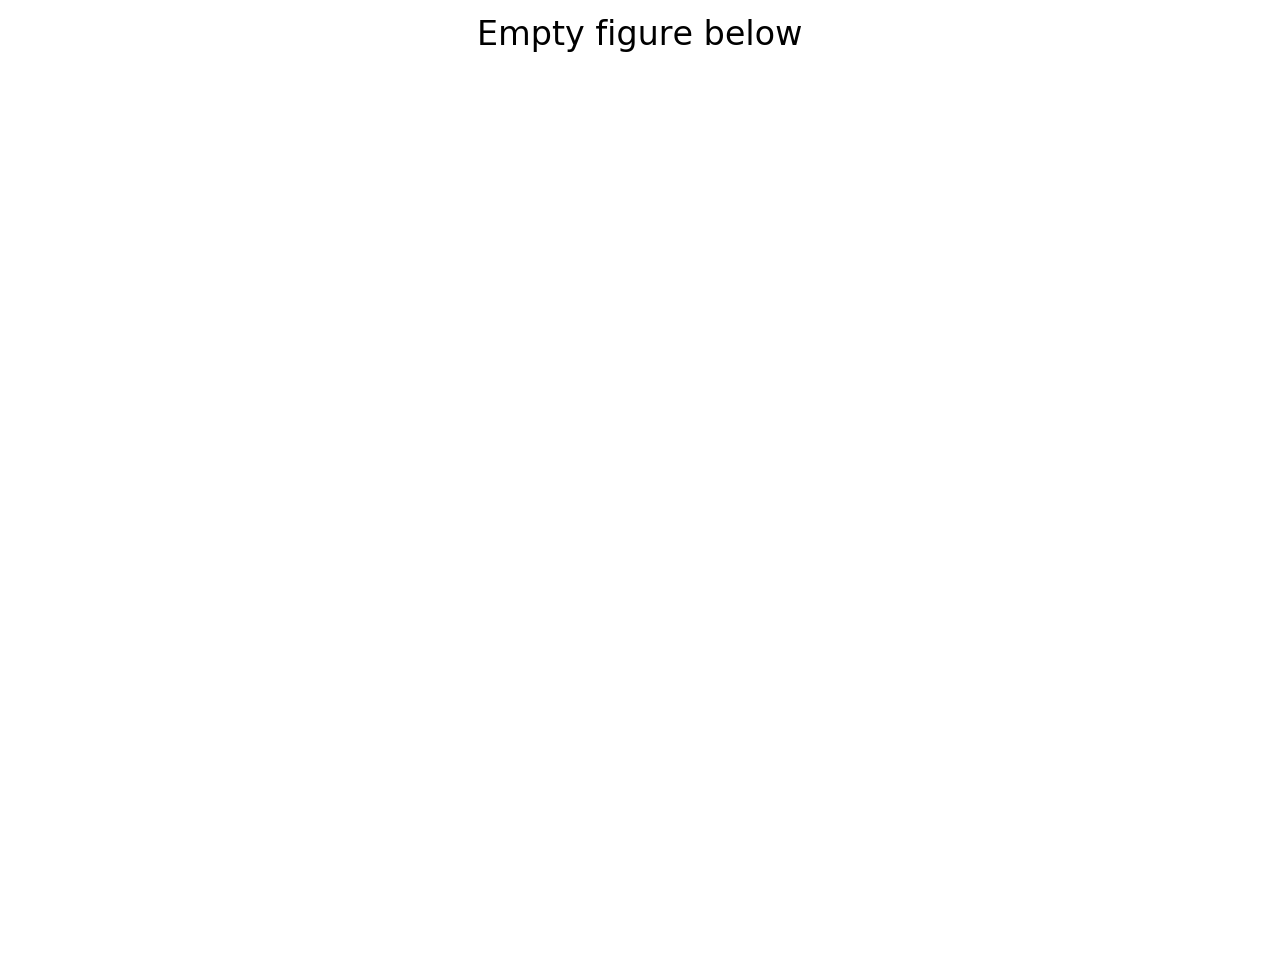

In [1]:
# Probability distributions

# To use this tutorial, read the commands and execute the code section by section.

# The learning objectives are to gain insights into:
#  - how to pseudo-randomly sample from probability distributions in Python
#     (typically numpy.random commands; e.g., numpy.random.randn for a normal distribution)
#  - how to generate theoretical distributions in Python
#     (typically *pdf commands; e.g., normpdf for a normal distribution) UPDATE WHEN FIND COMMANDS
#  - characteristics of several specific distribuions:
#     Bernoulli
#     binomial
#     Poisson
#     exponential
#     normal (Gaussian)
#  - comparing probability distribution functions (pdfs) and 
#     cumulative distribution functions (cdfs)

# List of helpful commands for random sampling in Python
    # https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html

# Helpful documentation for working with matplotlib:
    # https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py

# Original code: https://github.com/PennNGG/Statistics/tree/master/Probability%20Distributions
# Original code written for Matlab by Joshua Gold 
# Translated from Matlab to Python on 1.21.2020 by Catrina Hacker

# Import libraries
import matplotlib.pyplot as plt # Allows us to abbreviate matplotlib.pyplot as plt, etc.
import numpy as np 
import scipy

# Open a figure to plot stuff
%matplotlib notebook
fig = plt.figure();
fig.suptitle('Empty figure below');

In [2]:
# Bernoulli distribution

#  Canvas Discussion: https://canvas.upenn.edu/courses/1358934/discussion_topics/5121835
#  Wikipedia: https://en.wikipedia.org/wiki/Bernoulli_distribution
#  Mathworld: http://mathworld.wolfram.com/BernoulliDistribution.html

# A single Bernoulli trial: 
#  outcome = 1 with probabilty p
#  outcome = 0 with probabilty 1-p
 
#  This is a DISCRETE distribution because by definition it only takes on
#  specific, discrete values (in this case either 0 or 1)

# We can use np.random.uniform, which produces a random variable on the interval (0,1)
#  -- which means that all values are greater than 0 and less than 1
p = 0.7; # choose value for p
outcome = np.random.uniform() <= p; #  create logical variable from single pick
print(outcome) # True == 1 and False == 0 

True


In [3]:
# Or, equivalently, use np.random.binomial -- a random pick from a binomial distribution 
# with n=1 (i.e., a Bernoulli distribution is a special case of a binomial distribution with n=1)
p = 0.7; # choose value for p
n = 1;   # special case of just one trial
outcome = np.random.binomial(n,p);
print(outcome)

1


In [4]:
# Check that we are generating the probability correctly by generating a lot of trials and 
# testing if the outcome is as expected.
N = 1000; # Generate a lot of trials
outcomes = np.zeros((N,1)); # pre-allocate a big array
for x in range(1, N):
    outcomes[x] = np.random.binomial(n, p)

# Print out the results
print('{} zeros, {} ones, simulated p = {}, empirical p = {}'
      .format(N - np.count_nonzero(outcomes), np.count_nonzero(outcomes), p, np.count_nonzero(outcomes)/N))

332 zeros, 668 ones, simulated p = 0.7, empirical p = 0.668


In [5]:
# Binomial distribution

#  Canvas Discussion: https://canvas.upenn.edu/courses/1358934/discussion_topics/5002068
#  Wikipedia: https://en.wikipedia.org/wiki/Binomial_distribution
#  Mathworld: http://mathworld.wolfram.com/BinomialDistribution.html

# Distribution of the number of successful outcomes for a given number 
#  of Bernoulli trials, defined by two parameters:
#  p = probability of success on each trial (constant across trials)
#  n = number of trials

#  This is also a DISCRETE distribution because by definition it only 
#  takes on specific, discrete values (in this case non-negative integers 
#  corresponding to the number of successes in n tries; thus, values 0:n).

#  Choose some values
p = 0.7; n = 1000;

# Generate random picks. Note that this is as if we did the Bernoulli
# trials as above, but then just counted the successes
outcome = np.random.binomial(n,p);

# Print out the results
print('{} successes, simulated p = {}, empirical p = {}'
     .format(outcome, p, outcome/n))

695 successes, simulated p = 0.7, empirical p = 0.695


In [6]:
# The full probability distribution describes the probabilty of obtaining
# each possible number of successes (k), given n and p. If we set n=10,
# the  possible values of k are 0, 1, ..., 10. Now we use np.random.binomial
# to simulate many different picks to get a full distribution
p = 0.7;
n = 10;       # number of "trials" 
N = 1000;     # number of "simulations"
outcomes = np.random.binomial(n,p,N);

# Make histogram of all possible outcomes. We want bins centered on whole numbers so we offset the edges
bins = np.arange(-0.5, n + 1, 1);
hist, edges = np.histogram(outcomes, bins);
print(edges);
print(hist);

[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5]
[  0   0   0   4  38 100 209 252 245 114  38]


<IPython.core.display.Javascript object>


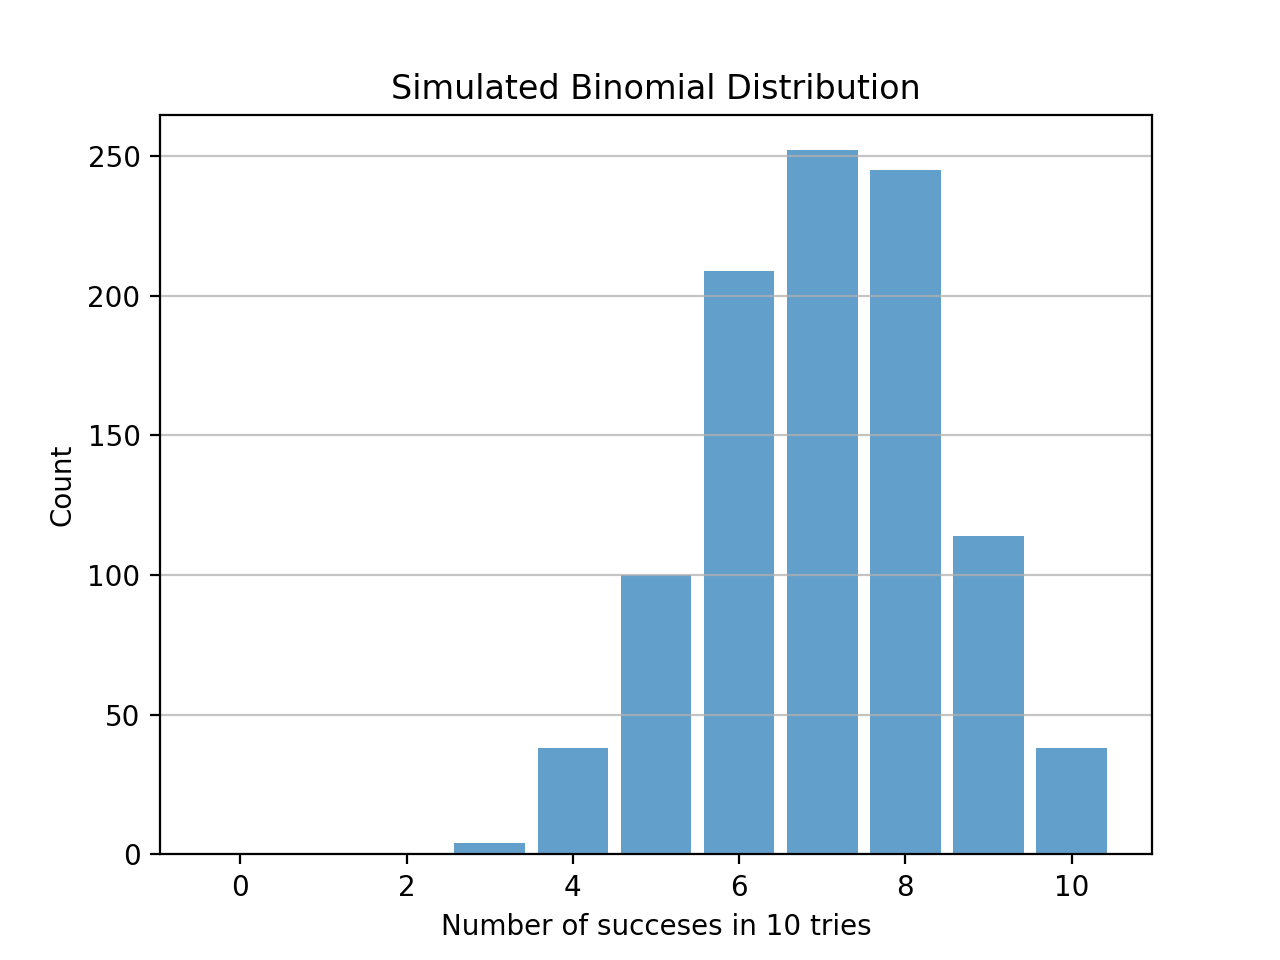

In [7]:
# Show a bar plot of the simulated bionimal distribution
plt.hist(outcomes, bins, alpha=0.7, rwidth=0.85);

plt.grid(axis='y', alpha=0.75) # Labels, etc.
plt.xlabel('Number of succeses in {} tries'.format(n));
plt.ylabel('Count');
plt.title('Simulated Binomial Distribution');

<IPython.core.display.Javascript object>


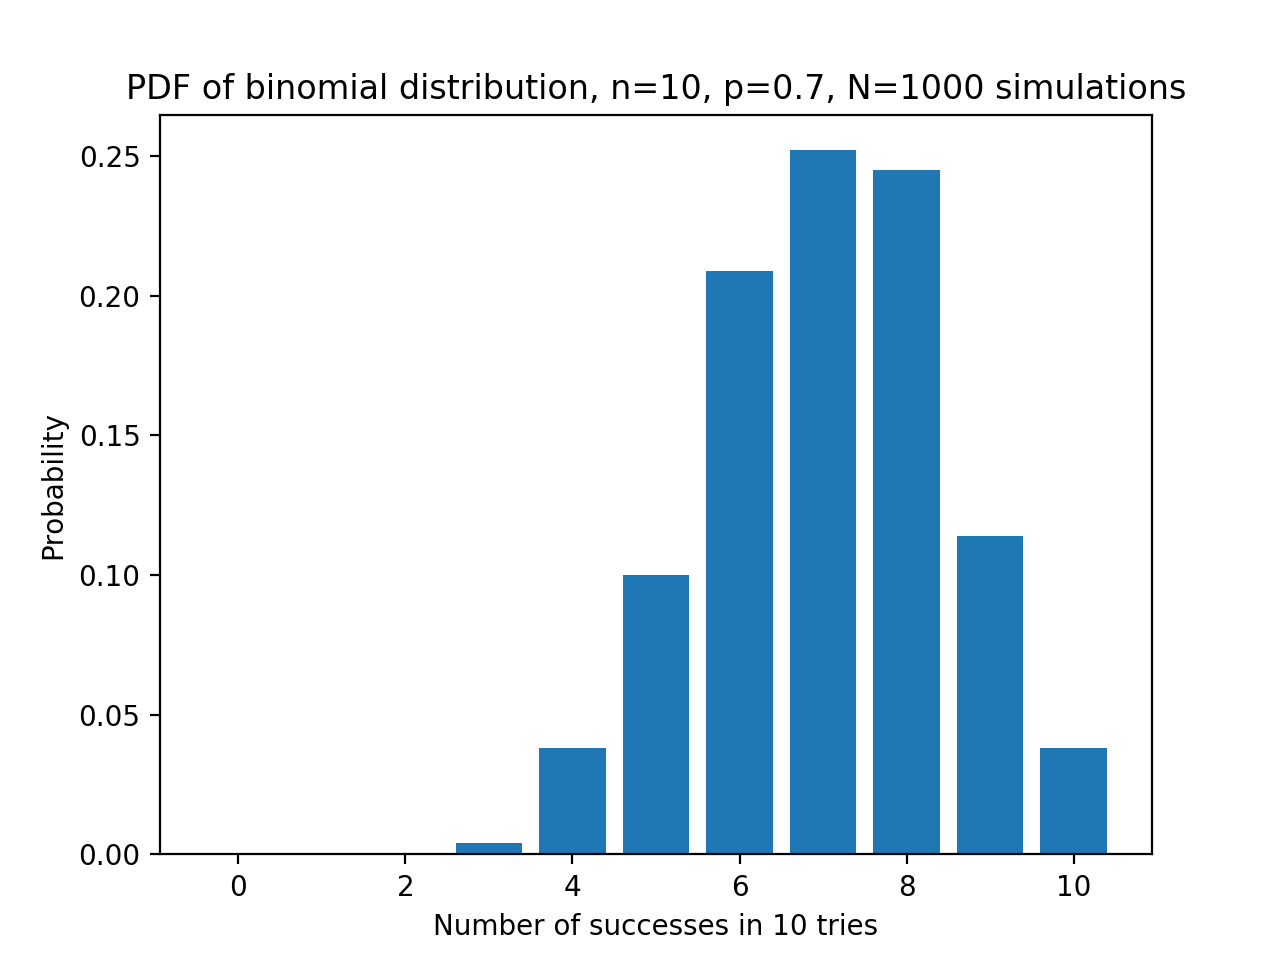

In [8]:
# Normalize it to make it a pdf. Here counts (the x-axis of the histogram)
#  is a DISCRETE variable, so we just have to add up the values
normalized = np.divide(hist, sum(hist));
x = np.arange(0, n+1, 1);
plt.bar(x, normalized);
plt.title('PDF of binomial distribution, n={}, p={}, N={} simulations'.format(n, p, N));
plt.xlabel('Number of successes in {} tries'.format(n));
plt.ylabel('Probability');

In [11]:
# Compare it to the real binomial distribution, which we find using binom.pmf
binomDist = scipy.stats.binom.pmf(x, N, p);
plt.plot(x, binomDist);

# plot(xs,Y,'ro-', 'LineWidth', 2, 'MarkerSize', 10);
# legend('Simulated', 'Theoretical')

AttributeError: module 'scipy' has no attribute 'stats'